# Monitoring Model Stability: Evaluating Population and Feature Consistency with PSI and VDI using SQL, Python and PySpark

**Introduction:**

In this data science portfolio project, our focus is on monitoring the stability of a credit scoring model using **PySpark, Python, and SQL**. The model generates a credit score, specifically the "Estimated Probability of Default," for customers based on categorical and continuous variables.

To effectively evaluate the model's stability, we will use two crucial metrics: **PSI (Population Stability Index)** and **VDI (Variable Deviation Index)**. These metrics will allow us to conduct a comparative analysis between the baseline scoring table from January 2023 and the validation scoring table from February 2023.


**Data Description:**

The data used in this project consists of two tables: the baseline scoring table and the validation scoring table, derived from a credit scoring model. These tables contain information for January 2023 and February 2023, respectively. Each month consists of data for 100 customers. The variables included in these tables are a mix of categorical and continuous variables.

Categorical variables:
1. "Grade" - Represents the credit grade or rating assigned to the customers.
2. "BINS_Utilization_at_Bureau" - Indicates the credit utilization ratio at the credit bureau.
3. "Region" - Refers to the geographical region of the customers.
4. "BINS_Inquiries_at_the_credit_bureau_last_6months" - Tracks the number of inquiries made at the credit bureau in the last 6 months.
5. "BINS_Other_Score" - Represents another credit score associated with the customers.

Continuous variables:
1. "Age" - Represents the age of the customers.
2. "Delinquency" - Indicates any past delinquency or missed payments.
3. "Time_at_Residence" - Represents the duration of time the customers have lived at their current residence.

The credit scoring model utilizes these variables to generate the "Estimated Probability of Default," which serves as an estimate of the likelihood of a customer defaulting on their credit obligations.

**Project Goals:**

The primary objective of this project is to assess the stability of the credit scoring model over time. We aim to identify any significant shifts or inconsistencies in the population distribution of the "Estimated Probability of Default" between the baseline and validation months. To achieve this, we will employ the **Population Stability Index (PSI)** and the **Variable Deviation Index (VDI)** metrics.

**Data Science Techniques:**

To accomplish the project goals, we will utilize a combination of PySpark, Python, and SQL. PySpark will help us efficiently handle and process large-scale data. Python will be used for data analysis, visualization, and model evaluation. SQL will come in handy for querying and manipulating the data in the baseline and validation scoring tables.
Through this data science project, we aim to demonstrate the importance of model stability evaluation and showcase the effective combination of these tools for practical data analysis and monitoring tasks.

**Conclusions:**

Please refer to the end of the project for detailed conclusions.

# Importing Excel Baseline and Validation Scoring Tables with PySpark

In this data science portfolio project, we start by importing the necessary libraries and initializing Apache Spark using the "findspark" package. This ensures that Spark is ready to be used for our data processing tasks.

In [1]:
import findspark
findspark.init()
findspark.find()

'C:\\Users\\u632915\\.conda\\envs\\my-env\\lib\\site-packages\\pyspark'

We install the essential libraries, pandas and PySpark, required for data handling and analysis in this data science project:

In [2]:
!pip install pandas pyspark

Then we import two essential libraries, pandas and PySpark, into the current Python environment for data manipulation and analysis:

In [3]:
import pandas as pd
from pyspark.sql import SparkSession

We create a SparkSession named 'ExcelImportExample' using PySpark, which allows us to work with distributed data and perform big data processing tasks efficiently:

In [4]:
spark = SparkSession.builder.appName("ExcelImportExample").getOrCreate()

In this code, we use conda to install the 'openpyxl' library, which enables us to read and write Excel files (XLSX format) effectively, making it easier to handle Excel data within our data science project:

In [5]:
conda install openpyxl

Retrieving notices: ...working... done
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\u632915\.conda\envs\my-env

  added / updated specs:
    - openpyxl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    arrow-cpp-11.0.0           |       ha81ea56_1         7.3 MB
    grpc-cpp-1.48.2            |       hfe90ff0_1        23.5 MB
    jupyter_client-7.4.9       |  py310haa95532_0         226 KB
    libevent-2.1.12            |       h56d1f94_1         417 KB
    libssh2-1.10.0             |       he2ea4bf_2         236 KB
    libthrift-0.15.0           |       h4364b78_2         777 KB
    openssl-3.0.9        



==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.7.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.2




==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.7.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.2




In this line of code, we use the pandas library to read the data from an Excel file. The data from the Excel file will be loaded into the variable 'excel_data', allowing us to perform data analysis and manipulation tasks on it within our data science project.

In [6]:
excel_data = pd.read_excel('C:/Rodrigo/PORTFOLIO/PSI VDI/PSI_VDI_Base.xlsx')

In this code, we use the pandas DataFrame "excel_data" to display the first 10 rows of data. This allows us to quickly inspect a subset of the data and get a sense of its structure and content during the data science project.

In [7]:
excel_data.head(10)

,CLIENT_ID,Period,Estimated_probability_Of_Default,Grade,Age,Delinquency,Time_at_Residence,BINS_Utilization_at_Bureau,Region,BINS_Inquiries_at_the_credit_bureau_last_6months,BINS_Other_Score
0,client_1,2023-01-01,0.000,A,18,0,5,0,Major Urban,0,830-850
1,client_2,2023-01-01,0.160,A,19,0,2,0,Major Urban,0,830-850
2,client_3,2023-01-01,0.050,A,22,0,6,0,Major Urban,0,830-850
3,client_4,2023-01-01,0.120,A,21,0,0,0,Major Urban,0,830-850
4,client_5,2023-01-01,0.150,A,23,0,6,0,Major Urban,0,830-850
5,client_6,2023-01-01,0.020,A,20,0,2,0,Major Urban,0,830-850
6,client_7,2023-01-01,0.045,A,20,0,3,0,Major Urban,0,830-850
7,client_8,2023-01-01,0.035,A,20,0,3,0,Major Urban,0,830-850
8,client_9,2023-01-01,0.070,A,23,0,2,0,Major Urban,0,830-850
9,client_10,2023-01-01,0.090,A,24,0,6,0,Major Urban,0,810-830


In this code, we use PySpark to create a DataFrame named 'spark_df' from the data stored in the pandas DataFrame 'excel_data'. This conversion allows us to leverage the distributed data processing capabilities of PySpark for further analysis and manipulation of the data within our data science project:

In [8]:
spark_df = spark.createDataFrame(excel_data)

C:\Users\u632915\.conda\envs\my-env\lib\site-packages\pyspark\sql\pandas\conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


With this code, we create a temporary view named "excel_table" from the DataFrame "spark_df" in PySpark. This temporary view allows us to execute SQL-like queries on the DataFrame, facilitating data exploration and analysis during the data science project:

In [9]:
spark_df.createOrReplaceTempView("excel_table")

In this code, we use PySpark to execute an SQL query on the temporary view "excel_table" and store the result in the variable "query_result":

In [10]:
query_result = spark.sql("SELECT * FROM excel_table where Period='2023-02-01' limit 10")

With this code, we display the first row of the DataFrame "query_result" obtained from the SQL query in a vertical format. This format allows us to view the row's data in a more detailed and structured manner, facilitating a closer inspection of the selected data within our data science project.

In [11]:
query_result.show(1, vertical=True)

-RECORD 0---------------------------------------------------------------
 CLIENT_ID                                        | client_101          
 Period                                           | 2023-02-01 00:00:00 
 Estimated_probability_Of_Default                 | 0.0                 
 Grade                                            | A                   
 Age                                              | 24                  
 Delinquency                                      | 0                   
 Time_at_Residence                                | 1                   
 BINS_Utilization_at_Bureau                       | 0                   
 Region                                           | Major Urban         
 BINS_Inquiries_at_the_credit_bureau_last_6months | 0                   
 BINS_Other_Score                                 | 830-850             
only showing top 1 row



As indicated in the data description, both the baseline and validation tables consist of 100 customers each in distinct months:

In [12]:
baselines_vs_validation = spark.sql("SELECT Period,count(*) as n_clients FROM excel_table group by Period")
baselines_vs_validation.show()

+-------------------+---------+
|             Period|n_clients|
+-------------------+---------+
|2023-01-01 00:00:00|      100|
|2023-02-01 00:00:00|      100|
+-------------------+---------+



#  Population Stability Index (PSI)

**Population Stability Index (PSI)** is a metric used to assess the stability of a population or distribution over time. It is commonly employed in the fields of statistics and data analytics. PSI measures the degree of change in the proportion or composition of a population between two time periods or datasets.

In simple terms, PSI helps to answer the question: "How different is the current population (baseline) from the reference population (validation)?"

The main purpose of PSI is to identify significant shifts or changes in the distribution of data, which can be crucial for various applications, such as monitoring model performance, detecting data drift, or evaluating the impact of changes in a business process or environment. **Data drift**, which refers to changes in the distribution of data over time or between datasets, can be detected using PSI. If there is a considerable PSI value between the baseline and validation datasets, it indicates that the data has drifted, and the model's performance may be affected.

*It's worth noting that PSI uses fixed estimated probability bounds from the baseline dataset, which remain constant throughout the analysis. This ensures that the comparison between the baseline and validation datasets is consistent and reliable over time.*

By comparing the proportions of groups or segments between two periods, analysts can assess if the changes are within an acceptable range or if further investigation is needed to understand the reasons behind the shifts and potential data drift. Monitoring PSI regularly helps data scientists and analysts maintain the reliability and accuracy of their models in dynamic environments where data distributions may change over time.

In the given code, we are computing the Population Stability Index (PSI) using **Common Table Expressions (CTE) in SQL** , **Python** and **Pyspark**. This analysis is part of a credit scoring model project, where we are scoring customers for January 2023 (considered as the baseline scoring table) and customers for February 2023 (considered as the validation scoring table).

Firstly, we identify the field that represents the Estimated Probability of Default, which we'll refer to as ESTIMATED_PROBABILITY_FIELD. Using this field, we generate bins to group the data, and for this calculation, we have set the number of bins to be used as PSI_N_BINS (10 bins, in this case).

The result of this analysis is presented as a **"system stability report"** which provides valuable insights into how stable the model is between the baseline and validation periods. This report helps us understand if there have been significant changes in the model's performance or data distribution over time.

In [13]:
# PSI: Population Stability Index PySpark

# Define the baseline and validation scoring tables as strings
BASELINE_SCORING_TABLE =  "(SELECT * FROM excel_table where Period='2023-01-01')" 
VALIDATION_SCORING_TABLE =  "(SELECT * FROM excel_table where Period='2023-02-01')"

# Define the column that contains the estimated probability of default.

ESTIMATED_PROBABILITY_FIELD = "Estimated_probability_Of_Default"

# Define the number of bins for the estimated probability of default
PSI_N_BINS=10


psi_table=spark.sql("""

WITH

-- Generate the number of Bins on the baseline scoring table

  baseline_table AS (
      SELECT NTILE("""+str(PSI_N_BINS)+""") OVER (ORDER BY """+ESTIMATED_PROBABILITY_FIELD+""" asc) AS bin,
      """+ESTIMATED_PROBABILITY_FIELD+"""
    FROM
      """+BASELINE_SCORING_TABLE+"""),
   
-- Generate a summarized table at the bin level with the probability bounds of each Bin, and 
-- the count of observations in each Bin.

  baseline AS (
    SELECT
      bin,
      MIN("""+ESTIMATED_PROBABILITY_FIELD+""") as MIN_PROB_1,
      MAX("""+ESTIMATED_PROBABILITY_FIELD+""") as MAX_PROB_1,
      COUNT(*) AS n_obs
    FROM
      baseline_table
    GROUP BY
      bin
  ),
  
  
 -- Join the validation scoring table with the summarized baseline table. This assigns the corresponding Bin 
 -- from the baseline to each record in the validation table. Then, summarize the validation table at the bin level.
 
  validation AS (
    SELECT
      b.bin,
      COUNT(*) AS n_obs
    FROM
      """+VALIDATION_SCORING_TABLE+""" v
      LEFT JOIN baseline b ON v."""+ESTIMATED_PROBABILITY_FIELD+""" BETWEEN b.MIN_PROB_1 AND b.MAX_PROB_1
    GROUP BY
      b.bin
  ),

  psi_table AS (
    SELECT
      b.bin,
      CONCAT(b.MIN_PROB_1, ' - ', b.MAX_PROB_1) AS interval,
      b.n_obs AS n_baseline,
      v.n_obs AS n_validation,
      b.n_obs * 1.0 / SUM(b.n_obs) OVER () AS p_baseline,
      v.n_obs * 1.0 / SUM(v.n_obs) OVER () AS p_validation
    FROM
      baseline b
      FULL OUTER JOIN validation v ON b.bin = v.bin
  )
SELECT
*,
p_baseline - p_validation as Difference,
p_baseline / p_validation as Ratio,
LN(p_baseline / p_validation) as Weight_of_Evidence,
(p_baseline - p_validation) * LN(p_baseline / p_validation) as Contribution

FROM
  psi_table
WHERE
  p_baseline <> 0 AND p_validation <> 0

""")

# Convert PySpark DataFrame to Python DataFrame
psi_table_df = psi_table.toPandas()
pd.set_option('display.max_columns', None)  # Set maximum columns to display
psi_table_df

,bin,interval,n_baseline,n_validation,p_baseline,p_validation,Difference,Ratio,Weight_of_Evidence,Contribution
0,1,0.0 - 0.16,10,7,0.1000000000000000,0.0700000000000000,0.030000000000000,1.428571,0.356675,0.010700
1,2,0.171 - 0.178,10,6,0.1000000000000000,0.0600000000000000,0.040000000000000,1.666667,0.510826,0.020433
2,3,0.181 - 0.188,10,6,0.1000000000000000,0.0600000000000000,0.040000000000000,1.666667,0.510826,0.020433
3,4,0.191 - 0.198,10,7,0.1000000000000000,0.0700000000000000,0.030000000000000,1.428571,0.356675,0.010700
4,5,0.201 - 0.208,10,9,0.1000000000000000,0.0900000000000000,0.010000000000000,1.111111,0.105360,0.001054
5,6,0.211 - 0.218,10,13,0.1000000000000000,0.1300000000000000,-0.030000000000000,0.769231,-0.262364,0.007871
6,7,0.221 - 0.228,10,13,0.1000000000000000,0.1300000000000000,-0.030000000000000,0.769231,-0.262364,0.007871
7,8,0.231 - 0.238,10,11,0.1000000000000000,0.1100000000000000,-0.010000000000000,0.909091,-0.095310,0.000953
8,9,0.241 - 0.248,10,13,0.1000000000000000,0.1300000000000000,-0.030000000000000,0.769231,-0.262364,0.007871
9,10,0.251 - 0.8,10,15,0.1000000000000000,0.1500000000000000,-0.050000000000000,0.666667,-0.405465,0.020273


If we simply add the values in the 'Contribution' column, we get the PSI value. The PSI value gives us an overall measure of population stability or changes between the baseline and validation datasets. A higher PSI value means there are more significant changes, which could indicate data drift or shifts in the data distribution:

In [14]:
total_contribution = psi_table_df["Contribution"].sum()
# Imprimir el resultado
print("PSI:", total_contribution)

PSI: 0.10815923669971311


In general, the index can be interpreted as follows:
    
**• PSI less than 0.10 indicates no significant change, and the existing model can continue to be used.**

**• PSI between 0.10 and 0.25 indicates a small change that warrants further investigation.**

**• PSI greater than 0.25 points to a significant shift in the applicant population, and it is recommended not to use this model any longer.**

The PSI value of 0.1081 indicates a significant shift in the distribution between the baseline and validation datasets. This suggests that the two datasets are not stable or consistent, and further investigation is needed to understand and address the underlying factors contributing to this discrepancy in order to ensure the reliability of the credit scoring model.

In the following code, we can visualize the overall measure of population stability or changes between the baseline and validation datasets:

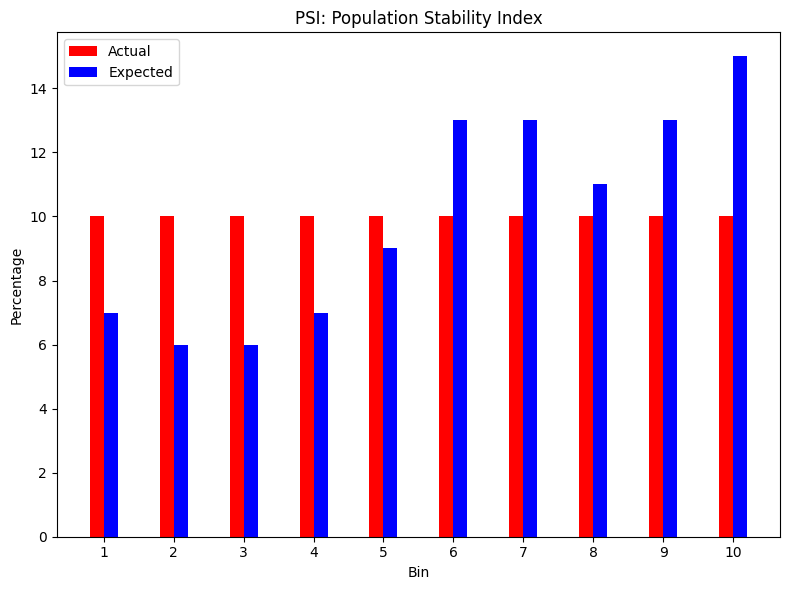

In [15]:
import matplotlib.pyplot as plt

# Get the necessary data from the DataFrame
p_baseline_values = psi_table_df['p_baseline']
p_validation_values = psi_table_df['p_validation']
bin_values = psi_table_df['bin']

# Convert p_validation to percentages
p_validation_percentages = p_validation_values * 100
p_baseline_percentages = p_baseline_values * 100

# Chart configuration
fig, ax = plt.subplots(figsize=(8, 6))  # Aumentar el tamaño de la figura
bar_width = 0.2  # Ajustar el ancho de las barras
index = list(range(len(bin_values)))  # Convertir el rango a lista

# Create the bars
bar1 = ax.bar(index, p_baseline_percentages, bar_width, color='red', label='Actual')
bar2 = ax.bar([i + bar_width for i in index], p_validation_percentages, bar_width, color='blue', label='Expected')

# Set up the axes and labels
ax.set_xlabel('Bin')
ax.set_ylabel('Percentage')
ax.set_title('PSI: Population Stability Index')
ax.set_xticks([i + bar_width / 2 for i in index])  # Ajustar la posición de las etiquetas del eje x
ax.set_xticklabels(bin_values)

# Show the legend and adjust the layout
ax.legend()
plt.tight_layout()

# Show the chart
plt.show()


If the PSI (Population Stability Index) deteriorates, it could indicate significant changes in the data distribution between the baseline and validation datasets. These changes may be related to specific variables in the model, which could affect the **VDI (Variable Deviation Index)** for those particular variables.

To identify which variables are contributing to the PSI deterioration, it is important to review each variable individually using the VDI. If a variable shows a significant deterioration in its VDI, it suggests that there have been significant changes in its distribution between the baseline and validation datasets.

Reviewing each variable separately helps understand how changes in those variables may be impacting the overall PSI. While some changes might be acceptable due to business or environmental factors, others could indicate issues or errors in the model or data.

In summary, if the PSI deteriorates, it is essential to examine individual variables using the VDI to identify any significant distribution changes. This provides valuable insights for making informed decisions about potentially adjusting or recalibrating the model.

# Variable Deviation Index (VDI) or Characteristic Stability Index (CSI) for Categorical Variables

The **Variable Deviation Index (VDI)** is a metric used to assess the stability of individual variables in a model or dataset. It complements the Population Stability Index (PSI) by focusing on the changes in the distribution of specific variables over time.

In simple terms, VDI helps answer the question: "How much have the individual variables changed between the baseline and validation datasets?"

While PSI evaluates the overall population stability, VDI looks at the changes in individual variables. It measures the degree of deviation or shift in the distribution of each variable between the two time periods or datasets.

*Unlike PSI, VDI is not based on fixed probability bounds but rather on the categories of the variable itself. It calculates the contribution of each category to the overall deviation, allowing data scientists and analysts to identify which specific categories within the variable have experienced significant changes.*

Just like PSI, VDI is also valuable in detecting **data drift**, as it highlights which variables have experienced significant changes. By analyzing VDI for each variable, data scientists and analysts can pinpoint the factors contributing to population instability.

For the credit scoring model project described in the code, VDI can help identify specific variables that have contributed to the PSI changes observed in the system stability report. It can be a crucial step in understanding the root causes of any performance variations and guide further investigation and potential model adjustments.

By using both PSI and VDI together, analysts can obtain a comprehensive view of population and variable stability, allowing them to make data-driven decisions and ensure the accuracy and reliability of the model over time.

In the given code, we are computing the Variable Deviation Index (VDI) for a categorical variable using **Common Table Expressions (CTE) in SQL, Python, and Pyspark**. This analysis is part of a credit scoring model project, specifically focusing on the "Grade" variable.

The purpose of VDI is to measure the degree of deviation or changes in the distribution of the "Grade" variable between the baseline and validation datasets.

To calculate VDI, we start by creating two separate datasets - one for the baseline period (January 2023) and another for the validation period (February 2023). Then, we count the occurrences of each category within the "Grade" variable for both datasets.

Next, we calculate the proportions of each category in both periods to understand how the distribution has changed. The VDI value is computed by comparing the proportions between the baseline and validation datasets, and a higher VDI indicates more significant changes in the distribution of the "Grade" variable.

The result of this analysis is presented as the "Variable Deviation Index" (VDI) in the **scorecard characteristic
analysis**. This analysis provides valuable insights into how the "Grade" variable's distribution has changed over time, contributing to a better understanding of the model's performance and potential data drift in the credit scoring model.

By monitoring VDI regularly for different categorical variables, data scientists and analysts can detect any shifts or instabilities in the model's predictions, allowing them to take appropriate actions to maintain model accuracy and reliability.

In [16]:
# VDI: Variable Deviation Index VARIABLE DISCRETA


# Define the baseline and validation scoring tables as strings
BASELINE_SCORING_TABLE =  "(SELECT * FROM excel_table where Period='2023-01-01')" 
VALIDATION_SCORING_TABLE = "(SELECT * FROM excel_table where Period='2023-02-01')"

# Define the the categorical variable
CATEGORICAL_VARIABLE="Grade"

vdi_table=spark.sql("""
WITH

  baseline AS (
    SELECT
      """+CATEGORICAL_VARIABLE+""" AS bin,
      COUNT(*) AS n_obs
    FROM
      """+BASELINE_SCORING_TABLE+"""
    GROUP BY
      """+CATEGORICAL_VARIABLE+"""
  ),
  
  validation AS (
    SELECT
      b.bin,
      COUNT(*) AS n_obs
    FROM
      """+VALIDATION_SCORING_TABLE+""" v
      LEFT JOIN baseline b ON v."""+CATEGORICAL_VARIABLE+""" = b.bin
    GROUP BY
      b.bin
  ),

  psi_table AS (
    SELECT
      b.bin,
      b.n_obs AS n_baseline,
      v.n_obs AS n_validation,
      b.n_obs * 1.0 / SUM(b.n_obs) OVER () AS p_baseline,
      v.n_obs * 1.0 / SUM(v.n_obs) OVER () AS p_validation
    FROM
      baseline b
      FULL OUTER JOIN validation v ON b.bin = v.bin
  )
SELECT
*,
p_baseline - p_validation as Difference,
p_baseline / p_validation as Ratio,
LN(p_baseline / p_validation) as Weight_of_Evidence,
(p_baseline - p_validation) * LN(p_baseline / p_validation) as Contribution
FROM
  psi_table
WHERE
  p_baseline <> 0 AND p_validation <> 0 """)

# Convert PySpark DataFrame to Python DataFrame
vdi_table_df = vdi_table.toPandas()
pd.set_option('display.max_columns', None)  # Set maximum columns to display
vdi_table_df

,bin,n_baseline,n_validation,p_baseline,p_validation,Difference,Ratio,Weight_of_Evidence,Contribution
0,A,25,18,0.2500000000000000,0.1800000000000000,0.070000000000000,1.388889,0.328504,0.022995
1,B,30,26,0.3000000000000000,0.2600000000000000,0.040000000000000,1.153846,0.143101,0.005724
2,C,21,28,0.2100000000000000,0.2800000000000000,-0.070000000000000,0.750000,-0.287682,0.020138
3,D,13,16,0.1300000000000000,0.1600000000000000,-0.030000000000000,0.812500,-0.207639,0.006229
4,E,7,9,0.0700000000000000,0.0900000000000000,-0.020000000000000,0.777778,-0.251314,0.005026
5,F,3,2,0.0300000000000000,0.0200000000000000,0.010000000000000,1.500000,0.405465,0.004055
6,G,1,1,0.0100000000000000,0.0100000000000000,0E-15,1.000000,0.000000,0.000000


If we simply add the values in the 'Contribution' column, we get the VDI value. The VDI value gives us an overall measure of variable stability or changes between the baseline and validation datasets. A higher VDI value means there are more significant changes, which could indicate data drift or shifts in the data distribution:

In [17]:
total_contribution = vdi_table_df["Contribution"].sum()
print("VDI:", total_contribution)

VDI: 0.06416717864772241


With a VDI (Variable Deviation Index) value of 0.0641 for the "Grade" variable, it indicates that there is no significant change in the distribution of credit grades between the baseline and validation datasets. This suggests that the "Grade" variable remains stable and can be considered reliable for credit scoring model predictions.

In general, the Variable Deviation Index (VDI) can be interpreted as follows:

**• VDI less than 0.10 indicates no significant change in the variable's distribution, and it is safe to continue using this variable in the model.**

**• VDI between 0.10 and 0.25 suggests a small change in the variable, which warrants further investigation to understand its potential impact on the model's performance.**

**• VDI greater than 0.25 points to a significant shift in the variable's distribution. In such cases, it is recommended not to use this variable in the model, as it may significantly affect the model's accuracy and reliability.**

In the following code, we can visualize the overall measure of variable stability or changes between the baseline and validation datasets:

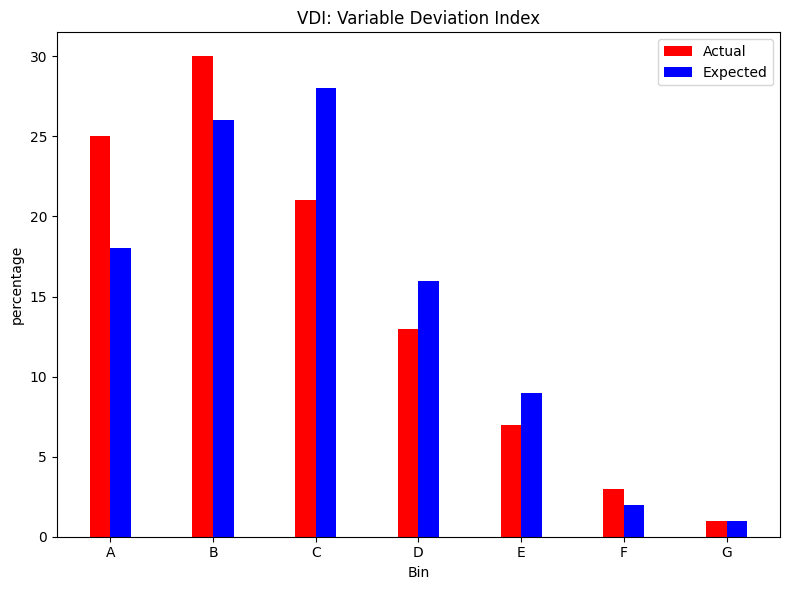

In [18]:
import matplotlib.pyplot as plt

# Get the necessary data from the DataFrame
p_baseline_values = vdi_table_df['p_baseline']
p_validation_values = vdi_table_df['p_validation']
bin_values = vdi_table_df['bin']

# Convert p_validation to percentages
p_validation_percentages = p_validation_values * 100
p_baseline_percentages = p_baseline_values * 100

# Chart configuration
fig, ax = plt.subplots(figsize=(8, 6))  # Aumentar el tamaño de la figura
bar_width = 0.2  # Ajustar el ancho de las barras
index = list(range(len(bin_values)))  # Convertir el rango a lista

# Create the bars
bar1 = ax.bar(index, p_baseline_percentages, bar_width, color='red', label='Actual')
bar2 = ax.bar([i + bar_width for i in index], p_validation_percentages, bar_width, color='blue', label='Expected')

# Set up the axes and labels
ax.set_xlabel('Bin')
ax.set_ylabel('percentage')
ax.set_title('VDI: Variable Deviation Index')
ax.set_xticks([i + bar_width / 2 for i in index])  # Ajustar la posición de las etiquetas del eje x
ax.set_xticklabels(bin_values)

# Show the legend and adjust the layout
ax.legend()
plt.tight_layout()

# Show the chart
plt.show()

## Applying VDI to Multiple Categorical Variables

Just like we did for the "Grade" categorical variable, we can apply the VDI calculation to all other categorical variables. We start by defining a list of categorical variables that we want to examine. These variables may encompass attributes such as 'Grade,' 'BINS_Utilization_at_Bureau,' 'Region,' 'BINS_Inquiries_at_the_credit_bureau_last_6months,' and 'BINS_Other_Score':

In [19]:
from pyspark.sql import SparkSession

# Define the lists of categorical variables
variables = ["Grade", "BINS_Utilization_at_Bureau", "Region", "BINS_Inquiries_at_the_credit_bureau_last_6months", "BINS_Other_Score"]


# Define the baseline and validation scoring tables as strings
BASELINE_SCORING_TABLE = "(SELECT * FROM excel_table WHERE Period='2023-01-01')"
VALIDATION_SCORING_TABLE = "(SELECT * FROM excel_table WHERE Period='2023-02-01')"


# Create an empty DataFrame to store the results
result_df = spark.createDataFrame([], schema="Variable STRING, VDI DOUBLE")

# Iterate over the variables and generate the results
for variable in variables:

    CATEGORICAL_VARIABLE = variable

    # Execute the SQL query and get the result
    result = spark.sql(f"""
        WITH
          baseline AS (
            SELECT
              {CATEGORICAL_VARIABLE} AS bin,
              COUNT(*) AS n_obs
            FROM
              {BASELINE_SCORING_TABLE}
            GROUP BY
              {CATEGORICAL_VARIABLE}
          ),

          validation AS (
            SELECT
              b.bin,
              COUNT(*) AS n_obs
            FROM
              {VALIDATION_SCORING_TABLE} v
              LEFT JOIN baseline b ON v.{CATEGORICAL_VARIABLE} = b.bin
            GROUP BY
              b.bin
          ),

          psi_table AS (
            SELECT
              b.bin,
              b.n_obs AS n_baseline,
              v.n_obs AS n_validation,
              b.n_obs * 1.0 / SUM(b.n_obs) OVER () AS p_baseline,
              v.n_obs * 1.0 / SUM(v.n_obs) OVER () AS p_validation
            FROM
              baseline b
              FULL OUTER JOIN validation v ON b.bin = v.bin
          )
        SELECT
          format_number(SUM((p_baseline - p_validation) * LN(p_baseline / p_validation)), 5) AS VDI
        FROM
          psi_table
        WHERE
          p_baseline <> 0 AND p_validation <> 0
    """)

    
    # Create a row with the results for the final DataFrame
    result_row = (variable, float(result.collect()[0]['VDI']))
    result_df = result_df.union(spark.createDataFrame([result_row], schema="Variable STRING, VDI DOUBLE"))


# Convert PySpark DataFrame to Python DataFrame
all_vdi_table_df = result_df.toPandas()
pd.set_option('display.max_columns', None)  # Set maximum columns to display
# Sort the DataFrame by VDI column in descending order
all_vdi_table_df.sort_values(by='VDI', ascending=False)

,Variable,VDI
3,BINS_Inquiries_at_the_credit_bureau_last_6months,0.36096
1,BINS_Utilization_at_Bureau,0.18005
0,Grade,0.06417
4,BINS_Other_Score,0.00662
2,Region,0.00373



Based on the Variable Deviation Index (VDI) values for the variables. We can interpret that:
Apologies for the oversight again. Here's the complete interpretation, including "Region":

1. "BINS_Inquiries_at_the_credit_bureau_last_6months" has a significant shift in its distribution and warrants further investigation before using it in the model.
2. "BINS_Utilization_at_Bureau" exhibits a small change in its distribution that needs to be examined in detail.
3. "Grade" displays a minimal change in its distribution, making it a reliable variable for credit rating predictions.
4. "BINS_Other_Score" shows very minimal change in its distribution, indicating its stability for usage in the credit scoring model.
5. "Region" also shows a negligible change in its distribution, suggesting its stability for usage in the credit scoring model.

It is crucial to address the significant shift in "BINS_Inquiries_at_the_credit_bureau_last_6months" by conducting a comprehensive investigation to understand its impact on the credit scoring model's performance.

Furthermore, while "BINS_Utilization_at_Bureau" demonstrates a small change, it still requires a thorough examination to ascertain its influence on the model's predictions.

In contrast, "Grade" proves to be a reliable variable for credit rating predictions due to its minimal change in distribution. Similarly, "BINS_Other_Score" and "Region" exhibit stability with very minimal and negligible changes in their distributions, respectively, making them suitable variables for usage in the credit scoring model.

# Variable Deviation Index (VDI) or Characteristic Stability Index (CSI) for Continuous Variables

In the provided code, we are calculating the Variable Deviation Index (VDI) for a continuous variable using Common Table Expressions (CTE) in SQL, Python, and Pyspark. This analysis focuses on the "Age" variable and is part of a credit scoring model project. The objective is to score customers for January 2023, which serves as the baseline scoring table, and customers for February 2023, which represents the validation scoring table.

The purpose of VDI is to measure the degree of deviation or changes in the distribution of the "Age" variable between the baseline and validation datasets. Unlike categorical variables, continuous variables like "Age" have a range of values, and VDI helps us understand how this range has changed over time.

We divide the continuous values of the "Age" variable into a specified number of bins (VDI_N_BINS), which helps group similar values together for analysis.

Next, we calculate the proportion of observations in each bin for both baseline and validation datasets. The VDI value is computed by comparing the proportions between the baseline and validation datasets. A higher VDI indicates more significant changes in the distribution of the "Age" variable.

It's important to highlight that the calculation of PSI and VDI for continuous variables is the same. Both metrics, PSI and VDI, utilize fixed maximum and minimum values for each age bin from the baseline dataset. These bounds remain constant throughout the analysis, ensuring a consistent and dependable comparison between the baseline and validation datasets over time. This level of consistency is essential for precisely measuring the stability and changes in the distribution of continuous variables, such as "Age," in the credit scoring model.

The results of this analysis are presented as the "Variable Deviation Index" (VDI) in the "scorecard characteristic analysis." This valuable analysis provides insights into how the distribution of the "Age" variable has evolved over time, contributing to a better understanding of the model's performance and potential data drift in the credit scoring model.

For this analysis, we select the continuous variable "Age" for examination, which we'll refer to as CONTINUOUS_VARIABLE. Using this field, we create bins to group the data, and for this calculation, we have chosen to use VDI_N_BINS (10 bins in this case).

In [20]:
# VDI: Variable Deviation Index PySpark

# Define the baseline and validation scoring tables as strings
BASELINE_SCORING_TABLE =  "(SELECT * FROM excel_table where Period='2023-01-01')" 
VALIDATION_SCORING_TABLE =  "(SELECT * FROM excel_table where Period='2023-02-01')"

# Define the continuous variable:
CONTINUOUS_VARIABLE = "Age"

# Define the number of bins for the continuous variable
VDI_N_BINS=10


vdi_table_continuous=spark.sql("""

WITH

-- Generate the number of Bins on the baseline scoring table

  baseline_table AS (
      SELECT NTILE("""+str(VDI_N_BINS)+""") OVER (ORDER BY """+CONTINUOUS_VARIABLE+""" asc) AS bin,
      """+CONTINUOUS_VARIABLE+"""
    FROM
      """+BASELINE_SCORING_TABLE+"""),
   
-- Generate a summarized table at the bin level with the probability bounds of each Bin, and 
-- the count of observations in each Bin.

  baseline AS (
    SELECT
      bin,
      MIN("""+CONTINUOUS_VARIABLE+""") as MIN_PROB_1,
      MAX("""+CONTINUOUS_VARIABLE+""") as MAX_PROB_1,
      COUNT(*) AS n_obs
    FROM
      baseline_table
    GROUP BY
      bin
  ),
  
  
 -- Join the validation scoring table with the summarized baseline table. This assigns the corresponding Bin 
 -- from the baseline to each record in the validation table. Then, summarize the validation table at the bin level.
 
  validation AS (
    SELECT
      b.bin,
      COUNT(*) AS n_obs
    FROM
      """+VALIDATION_SCORING_TABLE+""" v
      LEFT JOIN baseline b ON v."""+CONTINUOUS_VARIABLE+""" BETWEEN b.MIN_PROB_1 AND b.MAX_PROB_1
    GROUP BY
      b.bin
  ),

  psi_table AS (
    SELECT
      b.bin,
      CONCAT(b.MIN_PROB_1, ' - ', b.MAX_PROB_1) AS interval,
      b.n_obs AS n_baseline,
      v.n_obs AS n_validation,
      b.n_obs * 1.0 / SUM(b.n_obs) OVER () AS p_baseline,
      v.n_obs * 1.0 / SUM(v.n_obs) OVER () AS p_validation
    FROM
      baseline b
      FULL OUTER JOIN validation v ON b.bin = v.bin
  )
SELECT
*,
p_baseline - p_validation as Difference,
p_baseline / p_validation as Ratio,
LN(p_baseline / p_validation) as Weight_of_Evidence,
(p_baseline - p_validation) * LN(p_baseline / p_validation) as Contribution
FROM
  psi_table
WHERE
  p_baseline <> 0 AND p_validation <> 0

""")

# Convert PySpark DataFrame to Python DataFrame
vdi_table_continuous_df = vdi_table_continuous.toPandas()
pd.set_option('display.max_columns', None)  # Set maximum columns to display
vdi_table_continuous_df

,bin,interval,n_baseline,n_validation,p_baseline,p_validation,Difference,Ratio,Weight_of_Evidence,Contribution
0,1,18 - 23,10,14,0.1000000000000000,0.1228070175438596,-0.022807017543860,0.814286,-0.205444,0.004686
1,2,23 - 27,10,20,0.1000000000000000,0.1754385964912281,-0.075438596491228,0.570000,-0.562119,0.042405
2,3,27 - 29,10,14,0.1000000000000000,0.1228070175438596,-0.022807017543860,0.814286,-0.205444,0.004686
3,4,29 - 32,10,19,0.1000000000000000,0.1666666666666667,-0.066666666666667,0.600000,-0.510826,0.034055
4,5,32 - 34,10,8,0.1000000000000000,0.0701754385964912,0.029824561403509,1.425000,0.354172,0.010563
5,6,34 - 36,10,10,0.1000000000000000,0.0877192982456140,0.012280701754386,1.140000,0.131028,0.001609
6,7,36 - 42,10,5,0.1000000000000000,0.0438596491228070,0.056140350877193,2.280000,0.824175,0.046269
7,8,43 - 60,10,7,0.1000000000000000,0.0614035087719298,0.038596491228070,1.628571,0.487703,0.018824
8,9,63 - 78,10,3,0.1000000000000000,0.0263157894736842,0.073684210526316,3.800000,1.335001,0.098368
9,10,79 - 100,10,13,0.1000000000000000,0.1140350877192982,-0.014035087719298,0.876923,-0.131336,0.001843


If we simply add the values in the 'Contribution' column, we get the VDI value. The VDI value gives us an overall measure of variable stability or changes between the baseline and validation datasets. A higher VDI value means there are more significant changes, which could indicate data drift or shifts in the data distribution:

In [21]:
total_contribution = vdi_table_continuous_df["Contribution"].sum()
print("VDI:", total_contribution)

VDI: 0.26330868860811973


With a Variable Deviation Index (VDI) value of 0.2633 for the "Age" variable, it indicates a significant shift in the distribution of ages between the baseline and validation datasets. Such a VDI value suggests that further investigation is necessary to understand the impact of this change on the model's performance.

In the following code, we can visualize the overall measure of variable stability or changes between the baseline and validation datasets:

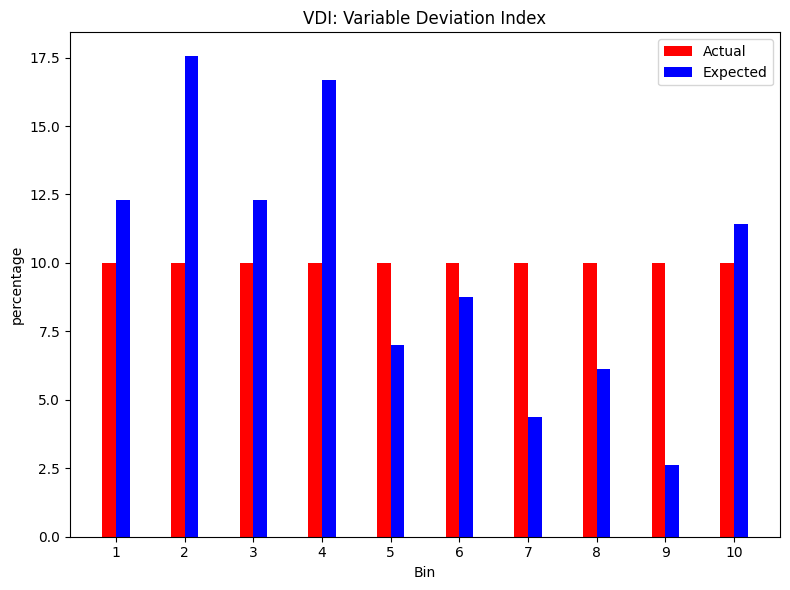

In [22]:
import matplotlib.pyplot as plt

# Get the necessary data from the DataFrame
p_baseline_values = vdi_table_continuous_df['p_baseline']
p_validation_values = vdi_table_continuous_df['p_validation']
bin_values = vdi_table_continuous_df['bin']

# Convert p_validation to percentages
p_validation_percentages = p_validation_values * 100
p_baseline_percentages = p_baseline_values * 100

# Chart configuration
fig, ax = plt.subplots(figsize=(8, 6))  # Aumentar el tamaño de la figura
bar_width = 0.2  # Ajustar el ancho de las barras
index = list(range(len(bin_values)))  # Convertir el rango a lista

# Create the bars
bar1 = ax.bar(index, p_baseline_percentages, bar_width, color='red', label='Actual')
bar2 = ax.bar([i + bar_width for i in index], p_validation_percentages, bar_width, color='blue', label='Expected')

# Set up the axes and labels
ax.set_xlabel('Bin')
ax.set_ylabel('percentage')
ax.set_title('VDI: Variable Deviation Index')
ax.set_xticks([i + bar_width / 2 for i in index])  # Ajustar la posición de las etiquetas del eje x
ax.set_xticklabels(bin_values)

# Show the legend and adjust the layout
ax.legend()
plt.tight_layout()

# Show the chart
plt.show()

## Applying VDI to Multiple Continuous Variables

In the same manner as we performed the VDI calculation for the "Age" continuous variable, we can apply the same methodology to all other continuous variables. To achieve this, we begin by creating a list that includes the continuous variables we wish to analyze. The variables in question are: "Age", "Delinquency", and "Time_at_Residence". By iterating the VDI calculation over each of these variables, we can gain valuable insights into how the distribution of each continuous variable has evolved over time, contributing to a comprehensive understanding of the credit scoring model's performance and potential data drift.

In [23]:
from pyspark.sql import SparkSession

# Define the list of continuous variables:
variables = ["Age", "Delinquency", "Time_at_Residence"]

# Define the number of bins for continuous variables
VDI_N_BINS = 10

# Define the baseline and validation scoring tables as strings
BASELINE_SCORING_TABLE = "(SELECT * FROM excel_table WHERE Period='2023-01-01')"
VALIDATION_SCORING_TABLE = "(SELECT * FROM excel_table WHERE Period='2023-02-01')"


# Create an empty DataFrame to store the results
result_df = spark.createDataFrame([], schema="Variable STRING, VDI DOUBLE")

# Iterate over the variables and generate the results
for variable in variables:

    CONTINUOUS_VARIABLE = variable
    
    # Execute the SQL query and get the result
    result  = spark.sql(f"""
        WITH
        -- Generate the number of Bins on the baseline scoring table
        baseline_table AS (
            SELECT NTILE({VDI_N_BINS}) OVER (ORDER BY {CONTINUOUS_VARIABLE} ASC) AS bin,
                   {CONTINUOUS_VARIABLE}
            FROM {BASELINE_SCORING_TABLE}
        ),
        -- Generate a summarized table at the bin level with the probability bounds of each Bin, and 
        -- the count of observations in each Bin.
        baseline AS (
            SELECT
                bin,
                MIN({CONTINUOUS_VARIABLE}) as MIN_PROB_1,
                MAX({CONTINUOUS_VARIABLE}) as MAX_PROB_1,
                COUNT(*) AS n_obs
            FROM
                baseline_table
            GROUP BY
                bin
        ),
        -- Join the validation scoring table with the summarized baseline table. This assigns the corresponding Bin 
        -- from the baseline to each record in the validation table. Then, summarize the validation table at the bin level.
        validation AS (
            SELECT
                b.bin,
                COUNT(*) AS n_obs
            FROM
                {VALIDATION_SCORING_TABLE} v
                LEFT JOIN baseline b ON v.{CONTINUOUS_VARIABLE} BETWEEN b.MIN_PROB_1 AND b.MAX_PROB_1
            GROUP BY
                b.bin
        ),
        psi_table AS (
            SELECT
                b.bin,
                CONCAT(b.MIN_PROB_1, ' - ', b.MAX_PROB_1) AS interval,
                b.n_obs AS n_baseline,
                v.n_obs AS n_validation,
                b.n_obs * 1.0 / SUM(b.n_obs) OVER () AS p_baseline,
                v.n_obs * 1.0 / SUM(v.n_obs) OVER () AS p_validation
            FROM
                baseline b
                FULL OUTER JOIN validation v ON b.bin = v.bin
        )
        SELECT
            format_number(SUM((p_baseline - p_validation) * LN(p_baseline / p_validation)), 20) AS VDI
        FROM
            psi_table
        WHERE
            p_baseline <> 0 AND p_validation <> 0
    """)

    # Create a row with the results for the final DataFrame
    result_row = (variable, float(result .collect()[0]['VDI']))
    result_df  = result_df.union(spark.createDataFrame([result_row], schema="Variable STRING, VDI DOUBLE"))


# Convert PySpark DataFrame to Python DataFrame
all_vdi_table_continuous_df = result_df.toPandas()
pd.set_option('display.max_columns', None)  # Set maximum columns to display
# Sort the DataFrame by VDI column in descending order
all_vdi_table_continuous_df.sort_values(by='VDI', ascending=False)

,Variable,VDI
0,Age,0.263309
2,Time_at_Residence,0.119561
1,Delinquency,0.102867


Based on the Variable Deviation Index (VDI) values for the variables. We can interpret that:
1. "Age" shows a significant shift in its distribution between the baseline and validation datasets. Further investigation is required to understand its potential impact on the credit scoring model's performance.
2. "Time_at_Residence" exhibits a moderate change in its distribution that needs to be carefully examined to assess its influence on the model's predictions.
3. "Delinquency" displays a minor change in its distribution, indicating its relative stability for usage in the credit scoring model.

Considering these interpretations, special attention should be given to the "Age" and "Time_at_Residence" variables to ensure the model's accuracy and reliability. Meanwhile, "Delinquency" appears to be a consistent and suitable variable for the credit scoring model.

# Conclusions:


In this data science portfolio project, we focused on monitoring the stability of a credit scoring model using PySpark, Python, and SQL. The model generated a credit score, specifically the "Estimated Probability of Default," for customers based on categorical and continuous variables.

To effectively evaluate the model's stability, we utilized two crucial metrics, PSI (Population Stability Index) and VDI (Variable Deviation Index). The PSI value of 0.1081 indicated a significant shift in the distribution between the baseline and validation datasets, prompting the need for further investigation to ensure the model's reliability.

Among the variables, "BINS_Inquiries_at_the_credit_bureau_last_6months" exhibited a notable shift, warranting in-depth examination before inclusion in the model. Meanwhile, "BINS_Utilization_at_Bureau," "Grade," "BINS_Other_Score," and "Region" demonstrated stability with minimal changes, making them suitable for the credit scoring model.

Additionally, the "Age" variable revealed a significant shift, requiring careful consideration, along with "Time_at_Residence," which showed moderate changes. Conversely, "Delinquency" displayed a minor shift and remains consistent as a viable variable for the model.

These findings highlight the significance of careful analysis and choosing stable variables to create an accurate and dependable credit scoring model, demonstrating the effectiveness of PySpark, Python, and SQL in data science projects.